In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

# 1. Load the Dataset
data = pd.read_csv(r"C:\Users\Satwik\Downloads\Text_Based_Emotion\balanced_dataset.csv")  # Update with your file path
texts = data["sentence"].values               # Input text data
labels = data["emotion"].values             # Emotion labels

# 2. Preprocess the Labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)  # Convert emotions to integers
num_classes = len(label_encoder.classes_)

# 3. Tokenize and Pad the Text Data
vocab_size = 10000  # Maximum number of words to keep in the tokenizer
max_length = 100    # Maximum sequence length for each input

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)

sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding="post", truncating="post")

# 4. Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, encoded_labels, test_size=0.2, random_state=42)

# 5. Build the LSTM Model
model = Sequential([
    Embedding(vocab_size, 128, input_length=max_length),  # Embedding Layer
    Bidirectional(LSTM(64, return_sequences=True)),      # Bidirectional LSTM
    Dropout(0.3),                                        # Dropout for regularization
    Bidirectional(LSTM(32)),                             # Another Bidirectional LSTM
    Dense(32, activation="relu"),                        # Dense layer with ReLU activation
    Dropout(0.3),                                        # Dropout for regularization
    Dense(num_classes, activation="softmax")             # Output layer with softmax
])

# 6. Compile the Model
model.compile(
    loss="sparse_categorical_crossentropy",  # Loss for multi-class classification
    optimizer="adam",                        # Optimizer
    metrics=["accuracy"]                     # Metric to track
)

# 7. Train the Model
history = model.fit(
    X_train, 
    y_train, 
    epochs=10,                  # Number of epochs
    batch_size=32,              # Batch size
    validation_split=0.2        # Validation split
)

# 8. Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# 9. Save the Model
model.save("lstm_emotion_model_balanced.h5")
tokenizer_json = tokenizer.to_json()
with open("tokenizer_balanced.json", "w") as f:
    f.write(tokenizer_json)

# 10. Use the Model for Prediction
def predict_emotion(text):
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_length, padding="post")
    prediction = model.predict(padded_sequence)
    emotion = label_encoder.inverse_transform([np.argmax(prediction)])
    return emotion[0]

# Example Prediction
print(predict_emotion("I am so happy today!"))  # Replace with your test sentence


Epoch 1/10


c:\Users\Satwik\.conda\envs\cuda_torch\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


600/600 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.3657 - loss: 1.4578 - val_accuracy: 0.8933 - val_loss: 0.3683
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.9091 - loss: 0.3448 - val_accuracy: 0.9131 - val_loss: 0.2762
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.9362 - loss: 0.2184 - val_accuracy: 0.9219 - val_loss: 0.2399
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.9501 - loss: 0.1696 - val_accuracy: 0.9175 - val_loss: 0.2850
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.9589 - loss: 0.1339 - val_accuracy: 0.9319 - val_loss: 0.2436
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.9621 - loss: 0.1137 - val_accuracy: 0.9300 - val_loss: 0.2434
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.9710 - loss: 0.0890 - val_accuracy: 0.9217 - val_loss: 0.2407
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.9693 - loss: 0.0916 - val_accurac

Test Accuracy: 91.67%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
joy


In [10]:
print(predict_emotion("i am anxious")) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
fear


In [11]:
# Save the LabelEncoder classes
np.save("label_classes_balanced.npy", label_encoder.classes_)


Folder: angry | Number of files: 958
Folder: disgusted | Number of files: 111
Folder: fearful | Number of files: 1024
Folder: happy | Number of files: 1774
Folder: neutral | Number of files: 1233
Folder: sad | Number of files: 555


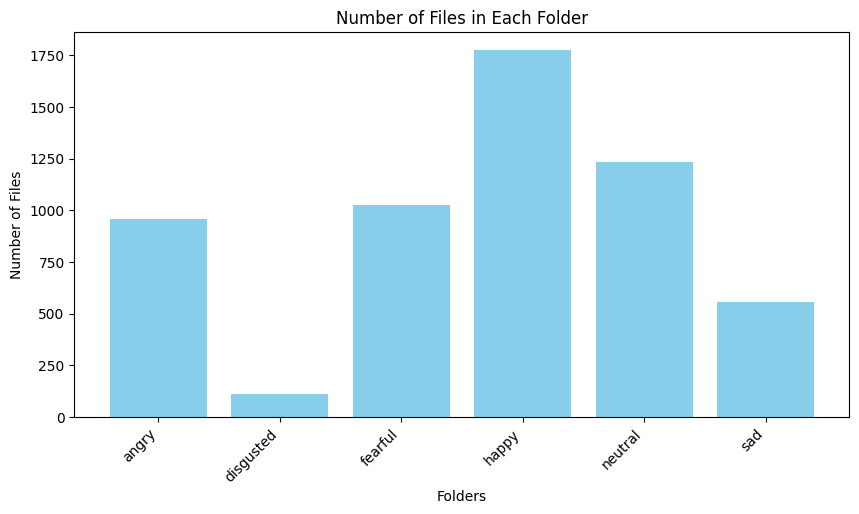

In [9]:
import os
import matplotlib.pyplot as plt

folder_path = r"C:\Users\Satwik\Downloads\Text_Based_Emotion\Image_Based\Image_Based"  # Base directory

folders = []
file_counts = []

for item in os.listdir(folder_path):
    item_path = os.path.join(folder_path, item)
    
    if os.path.isdir(item_path):  # Check if it's a folder
        num_files = len([f for f in os.listdir(item_path) if os.path.isfile(os.path.join(item_path, f))])
        print(f"Folder: {item} | Number of files: {num_files}")
        folders.append(item)
        file_counts.append(num_files)

# Plot the data
plt.figure(figsize=(10, 5))
plt.bar(folders, file_counts, color='skyblue')

# Labels and title
plt.xlabel("Folders")
plt.ylabel("Number of Files")
plt.title("Number of Files in Each Folder")
plt.xticks(rotation=45, ha='right')

# Show the graph
plt.show()


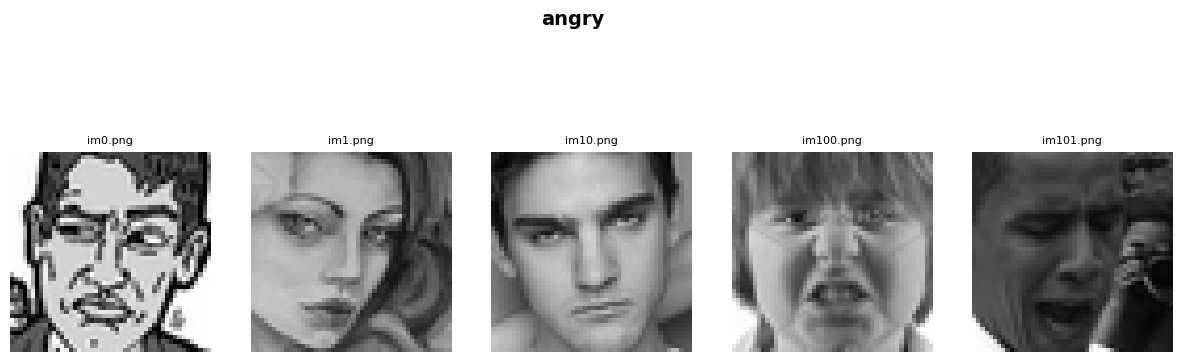

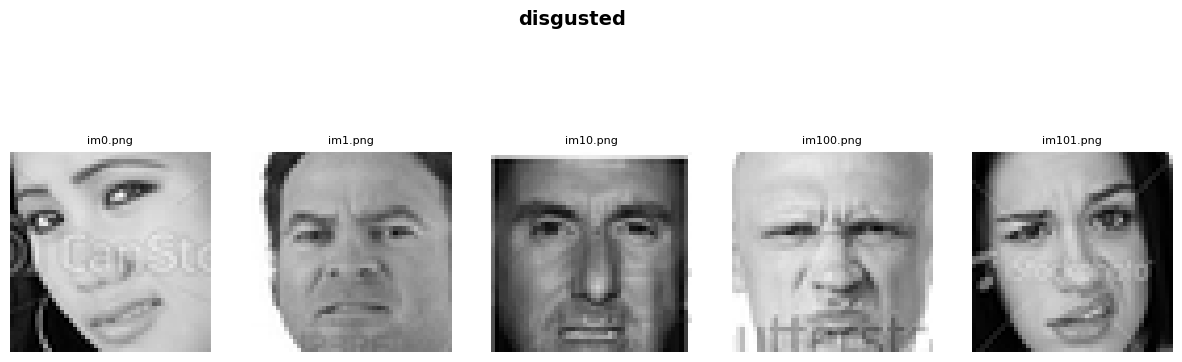

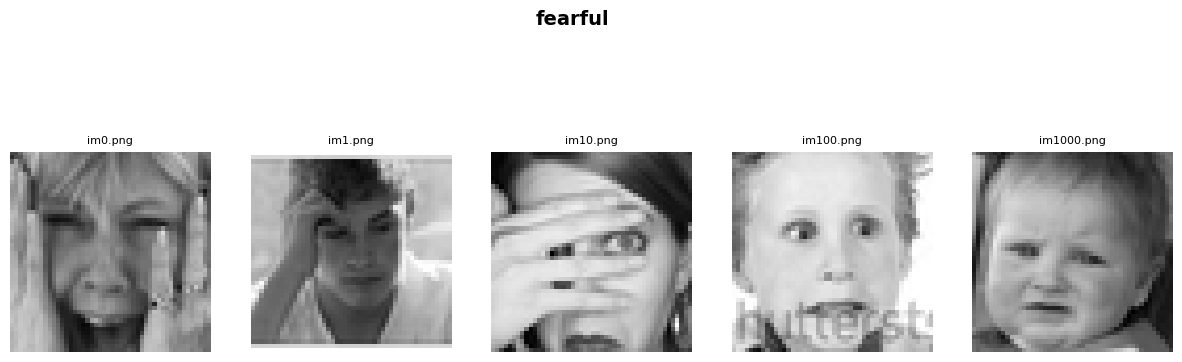

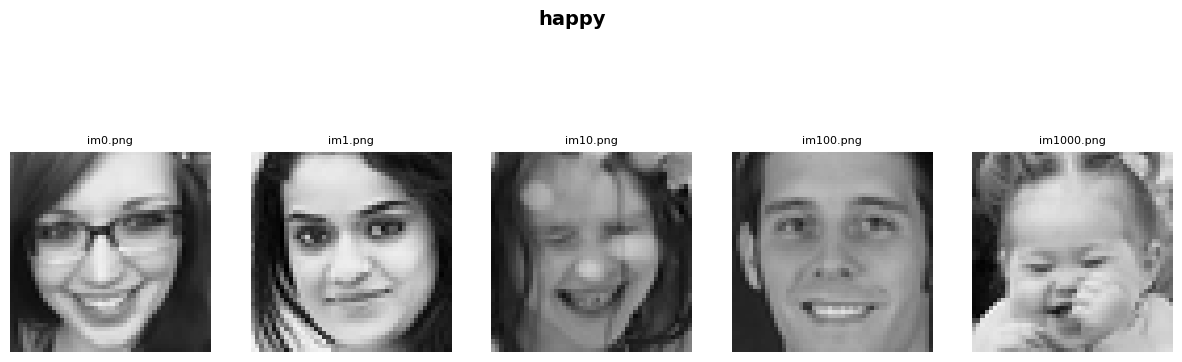

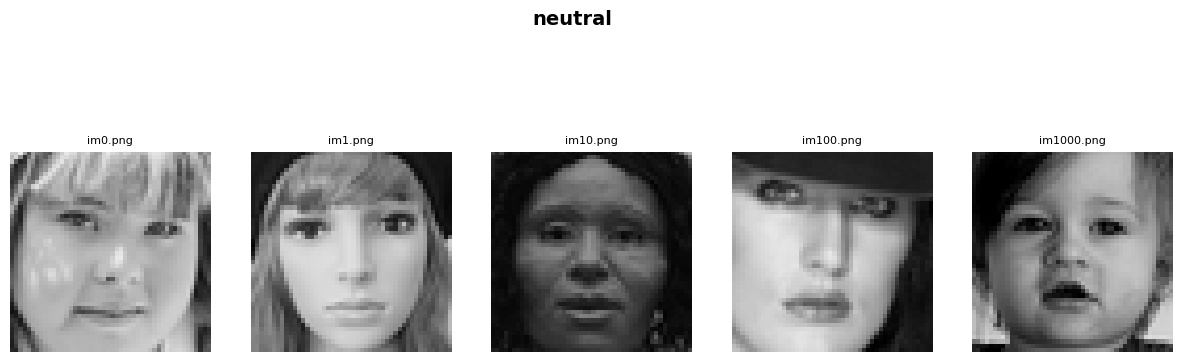

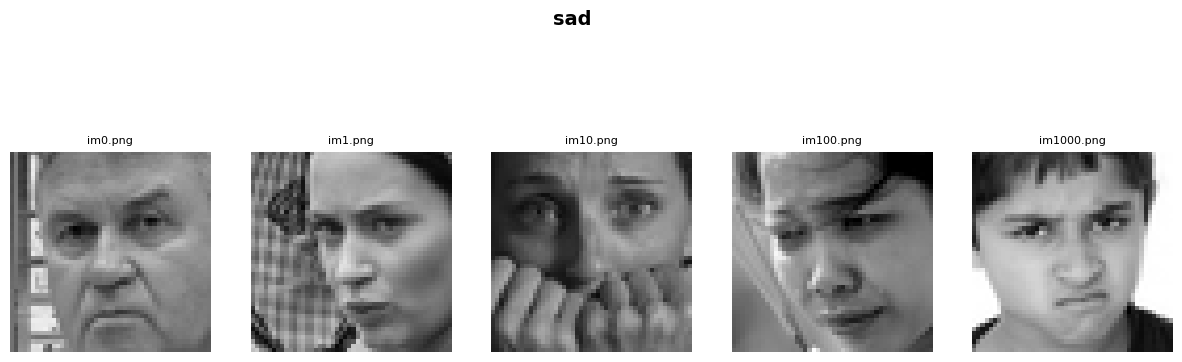

In [10]:
import os
import matplotlib.pyplot as plt
import cv2

folder_path = r"C:\Users\Satwik\Downloads\Text_Based_Emotion\Image_Based\Image_Based"  # Base directory

# Function to display images
def display_images(images, folder_name):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    fig.suptitle(folder_name, fontsize=14, fontweight="bold")  # Folder name as title

    for ax, img_path in zip(axes, images):
        img = cv2.imread(img_path)  # Read image
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB format
        
        ax.imshow(img)
        ax.axis("off")  # Hide axis
        ax.set_title(os.path.basename(img_path), fontsize=8)  # Image name

    plt.show()

# Iterate through folders
for item in os.listdir(folder_path):
    item_path = os.path.join(folder_path, item)
    
    if os.path.isdir(item_path):  # Check if it's a folder
        images = [os.path.join(item_path, f) for f in os.listdir(item_path) 
                if os.path.isfile(os.path.join(item_path, f)) and f.lower().endswith(('png', 'jpg', 'jpeg'))]
        
        if images:  # If images exist in folder
            display_images(images[:5], item)  # Show up to 5 images from each folder


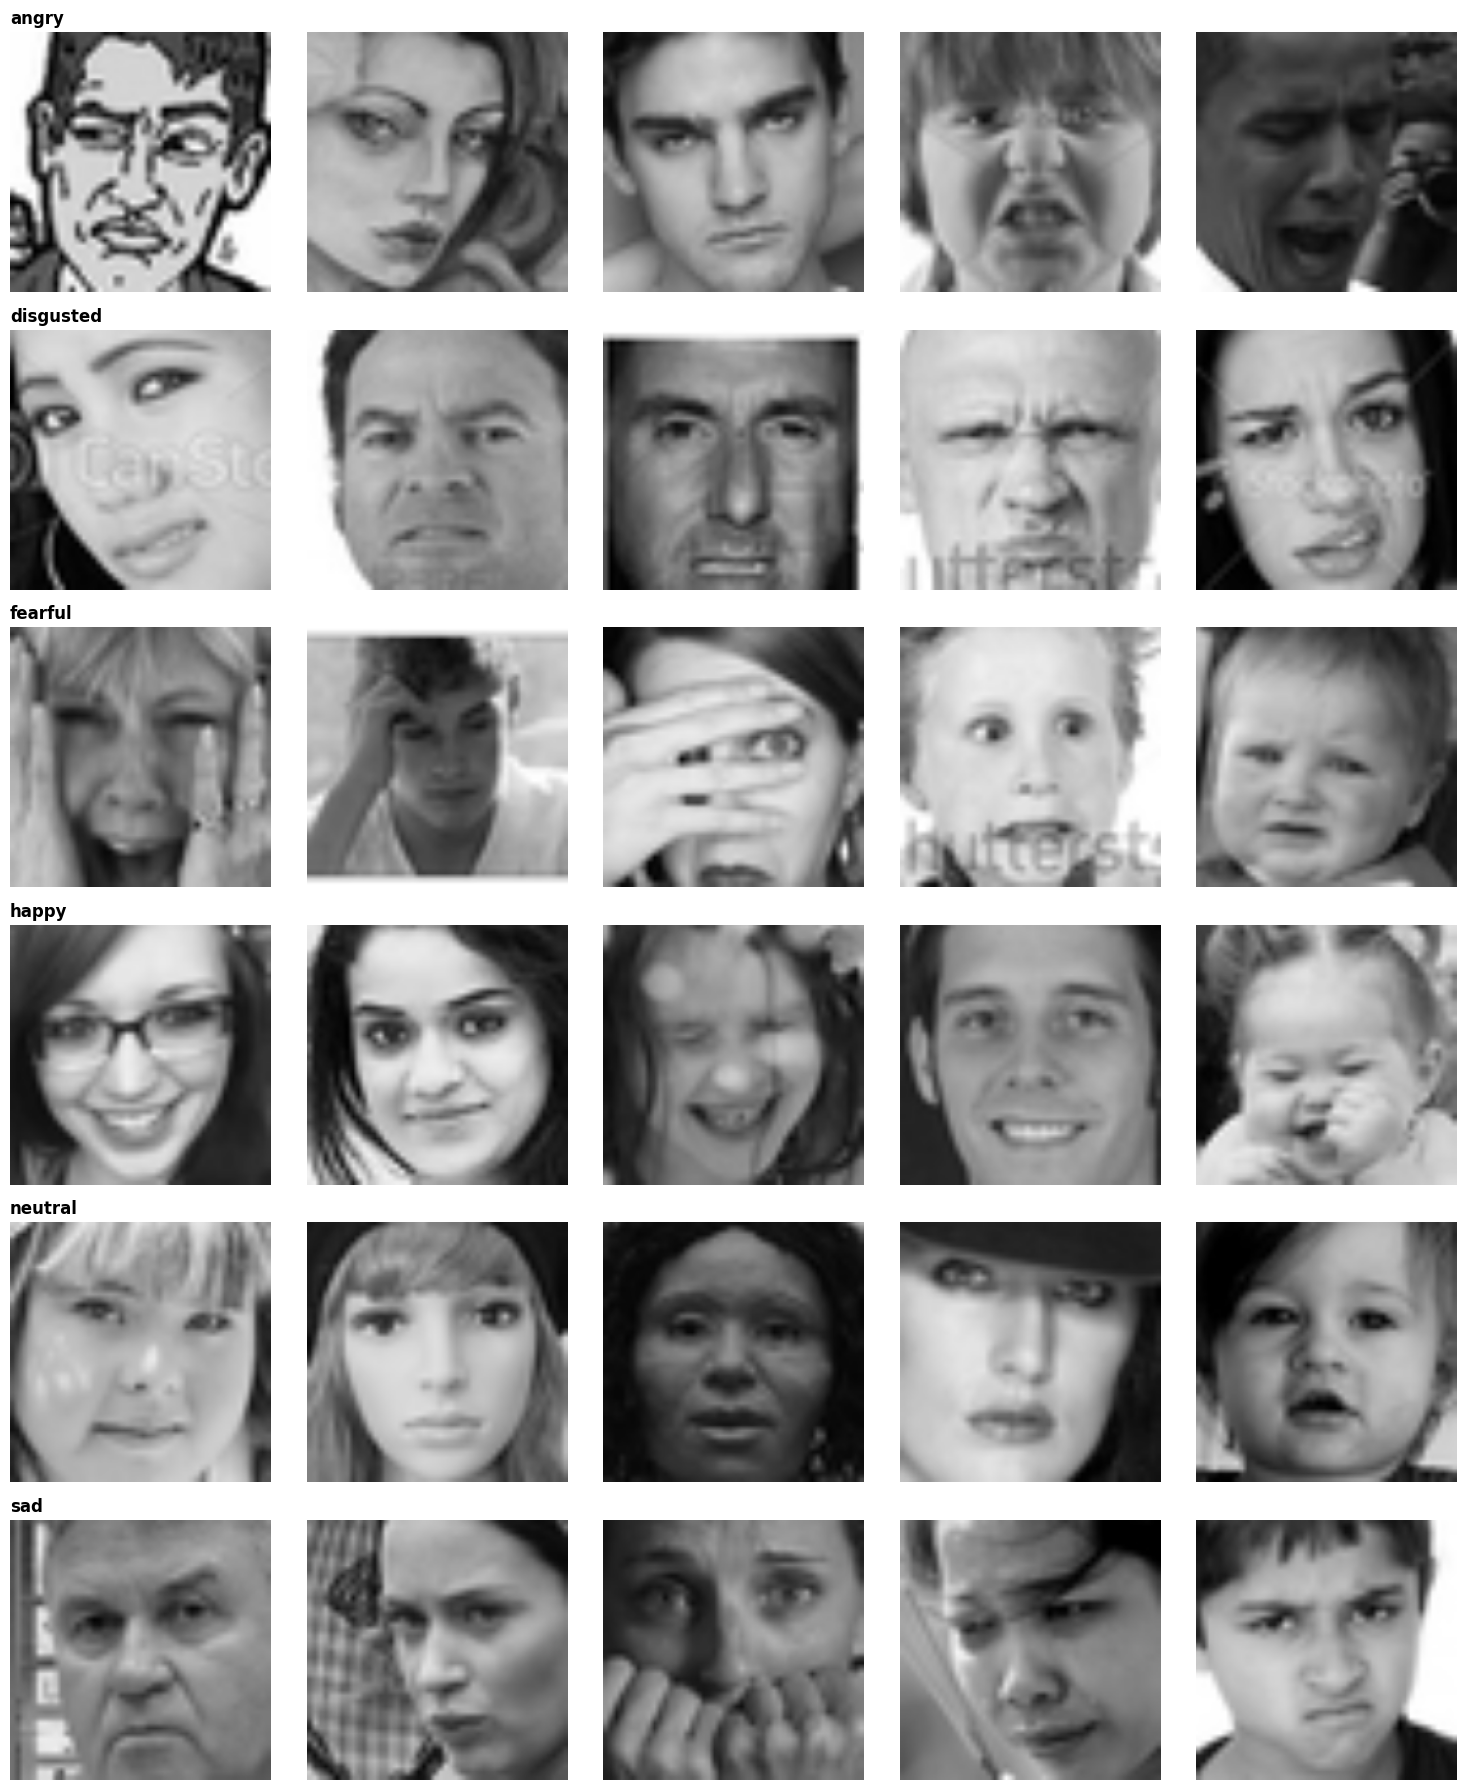

In [13]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

folder_path = r"C:\Users\Satwik\Downloads\Text_Based_Emotion\Image_Based\Image_Based"  # Base directory

folders = []
images_per_folder = []

# Iterate through folders and collect 5 images from each
for item in os.listdir(folder_path):
    item_path = os.path.join(folder_path, item)
    
    if os.path.isdir(item_path):  # Check if it's a folder
        images = [os.path.join(item_path, f) for f in os.listdir(item_path) 
                  if os.path.isfile(os.path.join(item_path, f)) and f.lower().endswith(('png', 'jpg', 'jpeg'))]
        
        if images:  # If images exist in folder
            folders.append(item)  # Store folder name
            images_per_folder.append(images[:5])  # Store up to 5 images from the folder

# Determine number of folders to display
num_folders = len(folders)

# Create a single figure with multiple rows (one per folder) and 5 columns
fig, axes = plt.subplots(num_folders, 5, figsize=(15, 3 * num_folders))

for row, (folder_name, images) in enumerate(zip(folders, images_per_folder)):
    for col, img_path in enumerate(images):
        img = cv2.imread(img_path)  # Read image
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        img = cv2.resize(img, (200, 200))  # Resize for uniformity
        
        axes[row, col].imshow(img)
        axes[row, col].axis("off")  # Hide axis
        
        if col == 0:  # Label the first image in each row with the folder name
            axes[row, col].set_title(folder_name, fontsize=12, fontweight="bold", loc='left')

# Adjust layout and show plot
plt.tight_layout()
plt.show()
